In [2]:
from src.si.feature_extraction.k_mer import KMer
from src.si.linear_model.logistic_regression import LogisticRegression
from src.si.model_selection.split import train_test_split
from src.si.io.CSV import read_csv


In [3]:
tfbs_data = read_csv("/Users/josediogomoura/machine_learning/datasets/si-datasets_update/tfbs.csv", sep=',', label=True, features=True)

In [4]:
print(tfbs_data.shape())

(2000, 1)


In [5]:
tfbs_data.head()

(array([['CCGAGGGCTATGGTTTGGAAGTTAGAACCCTGGGGCTTCTCGCGGACACC'],
        ['GAGTTTATATGGCGCGAGCCTAGTGGTTTTTGTACTTGTTTGTCGCGTCG'],
        ['GATCAGTAGGGAAACAAACAGAGGGCCCAGCCACATCTAGCAGGTAGCCT'],
        ['GTCCACGACCGAACTCCCACCTTGACCGCAGAGGTACCACCAGAGCCCTG'],
        ['GGCGACCGAACTCCAACTAGAACCTGCATAACTGGCCTGGGAGATATGGT']],
       dtype=object),
 array([0, 0, 0, 1, 1]))

In [6]:
# Usa o KMer para obter a frequência de cada substring em cada sequência do dataset. Tamanho da substring (k): 3
kmer = KMer(k=3, alphabet='DNA')

In [7]:
kmer.fit(tfbs_data)

In [8]:
kmer.alphabet

'ACGT'

In [9]:
kmer.transform(tfbs_data)

In [12]:
kmer_dataset = kmer.fit_transform(tfbs_data)

In [14]:
kmer_dataset.summary()

,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,AGC,...,TCG,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT
mean,0.656000,1.172500,0.66050,0.662000,0.632000,1.137500,0.7600,1.146500,0.6200,0.664000,...,0.77450,0.6400,0.646500,0.674000,0.64550,0.651000,0.653500,0.677000,0.663500,0.694000
median,0.000000,1.000000,0.00000,0.000000,0.000000,1.000000,1.0000,1.000000,0.0000,0.000000,...,1.00000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,...,0.00000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,5.000000,4.00000,5.000000,6.000000,5.000000,5.0000,5.000000,5.0000,4.000000,...,4.00000,5.0000,5.000000,4.000000,4.00000,5.000000,4.000000,4.000000,4.000000,9.000000
variance,1.007664,0.822744,0.63924,0.613756,0.700576,0.779594,0.7054,0.789038,0.6786,0.636104,...,0.65765,0.7004,0.611538,0.649724,0.60083,0.661199,0.611438,0.601671,0.630268,1.109364


In [15]:
from sklearn.preprocessing import StandardScaler

kmer_dataset.X = StandardScaler().fit_transform(kmer_dataset.X)

In [16]:
train, test = train_test_split(kmer_dataset, test_size=0.2, random_state=42)

In [17]:
logistic = LogisticRegression(max_iter=2000)
logistic = logistic.fit(train)

In [18]:
logistic.score(test)

0.9575

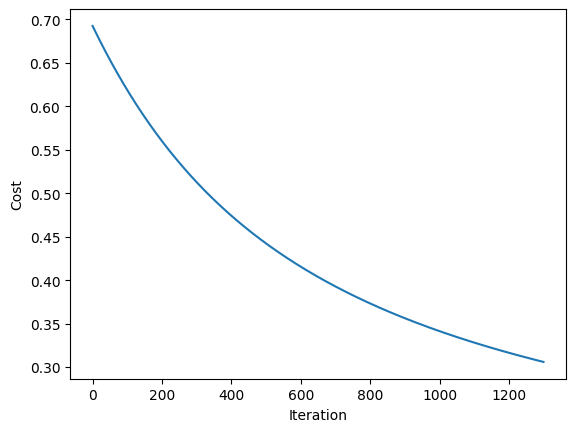

In [19]:
logistic.cost_function_plot()

In [20]:
# Testa o novo KMer para sequências de aminoácidos

In [28]:
transporters_data = read_csv("/Users/josediogomoura/machine_learning/datasets/si-datasets_update/transporters.csv", sep=',', label=True, features=True)
print(transporters_data.head())
print(transporters_data.shape())
print(transporters_data.features, transporters_data.label)

(array([['MKKTLIALSVSAAAMATGVNAAELYNQDGTSLEMGGRAEARLSMKDGDAQDNSRIRLNFLGTQAINDNLYGVGFWEGEFTTNEQGGVDGDVNKDSSNLDTRYAYAGLGGAWGEFTYGKNEGALGVITDFTDIMAYHGNSAADKLAVADRSDNMMSYKGQFENLSVKASYRFADRKLNDAGTEYTDNGQDGYSLSAIYAVADTGLELGAGYADQDEANEYMLAASYTMGDLYFAGIFTDGEKAKTEGDYTGYELAGAYTLGQTVFTTTYNNAETNNETSANNFAVDASYYFKPNFRGYVSYNFNLIDSGDKLGKVGGNTTASKADAEDELALGLRYDF'],
       ['MRIGVYVCHCGLNIAGVIDVSALEEMAGELEDVVLAREVQFLCSDSGQEGIIKDIKDNKIDRVVIAACSPRLHEKTFRHVMEKADLNPYLMEMVNIREQCSWVHADDPQMATQKAFDLIRMGVAKARFLRELSATSSKASRNVLIIGGGVAGIEAALNLAEAGFPVTMVERESTIGGKMALMNEVFPTNDCSICVLAPKMTEVQNHPNITLYTYSEVTDISGSVGKFHVRVTRKPRFVLEDKCKGCVDLCSEVCPVEIENPMNYGIGKSRAIYMPIPQSVPQVVLIDPDHCVGCGLCQLACPAEAVDYEQKPEEIEFEAGAVIVSTGYQLFDASRKKEYGFGKYPDVITNMQLERMLNSAGPTGGRVLVPSTGQPPESVAFIQCVGSRDKTVGNEHCSRVCCMAALKNSQMVKERYPGTDITIHYIDIRAAGEMYEEYYARTQGMGVDFIRGKVAEVYAGEDGRPVVRYENTLESRVEEEAHDLVVLSTGYEPSKAAEGIGRMLNLARRPDRFFASAHPKMRPVDAPVSGVFLAGCASGPKEIQVSIAQGSACASKVMQLLGTGELEADPMGAHVDPDKCIGCRTCVEVCKFGKISIVDKKAVVDEVSCYGCGDCSAACPVGAIQMRNFENEQILAQVRA

In [29]:
pep_kmers = KMer(k=2, alphabet='PEPTIDE')

In [30]:
pep_kmers.fit_transform(transporters_data)

In [36]:
# scale the data
transporters_data.X = StandardScaler().fit_transform(transporters_data.X)

ValueError: could not convert string to float: 'MKKTLIALSVSAAAMATGVNAAELYNQDGTSLEMGGRAEARLSMKDGDAQDNSRIRLNFLGTQAINDNLYGVGFWEGEFTTNEQGGVDGDVNKDSSNLDTRYAYAGLGGAWGEFTYGKNEGALGVITDFTDIMAYHGNSAADKLAVADRSDNMMSYKGQFENLSVKASYRFADRKLNDAGTEYTDNGQDGYSLSAIYAVADTGLELGAGYADQDEANEYMLAASYTMGDLYFAGIFTDGEKAKTEGDYTGYELAGAYTLGQTVFTTTYNNAETNNETSANNFAVDASYYFKPNFRGYVSYNFNLIDSGDKLGKVGGNTTASKADAEDELALGLRYDF'